# Question 1
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next question when we will be implementing the same using Tensorflow.


Run the first 3 cells. Your code begins after that.

In [1]:
import numpy as np
from keras.datasets import mnist
import random
import seaborn as sns


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [3]:
#train_X=train_X.reshape(60000,784)    # flattening
#test_X=test_X.reshape(10000,784)

#train_y=train_y.reshape(60000,1)
#test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 1.1 Write the code for Sigmoid Function.

In [4]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 1.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [5]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape the data to have shape (num_samples, 784, 1)
train_X = train_X.reshape(train_X.shape[0], 784, 1)
test_X = test_X.reshape(test_X.shape[0], 784, 1)

# Normalize the data to be in the range [0, 1]
train_X = train_X / 255.0
test_X = test_X / 255.0

# Make sure the labels are in the correct shape (num_samples, 1)
train_y = train_y.reshape(train_y.shape[0], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

# If you want to use a smaller subset of the data
train_X = train_X[:10000]
train_y = train_y[:10000]
test_X = test_X[:1000]
test_y = test_y[:1000]

# Combine the data and labels into a list of tuples
train_data = list(zip(train_X, train_y))
test_data = list(zip(test_X, test_y))

import random

class Network(object):
    def __init__(self, sizes):
        """
        Initialize the network with given sizes.
        `sizes` is a list containing the number of neurons in each layer.
        """
        self.sizes = sizes
        self.num_layers = len(sizes)  # The number of layers is the length of the sizes list
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]

    def show(self):
        for bias in (self.biases):
            print(bias.shape)
        for weight in self.weights:
            print(weight.shape)

    def sigmoid(self, z):
        """The sigmoid function."""
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_prime(self, z):
        """Derivative of the sigmoid function."""
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forwardpropagation(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w, a) + b)  # sig (w.a +b)
            print("Shape after layer:", a.shape)
            # print(a.shape)
        return a



    def backpropagation(self, x, y):
        """
        Return a tuple (nabla_b, nabla_w) representing the gradient for the cost function.
        `nabla_b` and `nabla_w` are layer-by-layer lists of numpy arrays.
        """
        y_t = np.zeros((10, 1))
        y_t[y] = 1

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        activation = x
        activation_list = [x]

        for w, b in zip(self.weights, self.biases):
            activation = self.sigmoid(np.dot(w, activation) + b)
            activation_list.append(activation)

        delta = (activation_list[-1] - y_t) * self.sigmoid_prime(np.dot(self.weights[-1], activation_list[-2]) + self.biases[-1])

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activation_list[-2].T)

        for j in range(2, self.num_layers):
            sig_der = self.sigmoid_prime(np.dot(self.weights[-j], activation_list[-j - 1]) + self.biases[-j])
            delta = np.dot(self.weights[-j + 1].T, delta) * sig_der

            nabla_b[-j] = delta
            nabla_w[-j] = np.dot(delta, activation_list[-j - 1].T)

        return (nabla_b, nabla_w)

    def SGD(self, train_data, epochs, mini_batch_size, lr):
        n_train = len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k + mini_batch_size] for k in range(0, n_train, mini_batch_size)]

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i + 1))

    def update_mini_batch(self, mini_batch, lr):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_b, delta_w = self.backpropagation(x, y)
            nabla_b = [nb + db for nb, db in zip(nabla_b, delta_b)]
            nabla_w = [nw + dw for nw, dw in zip(nabla_w, delta_w)]

        self.weights = [w - lr * nw / len(mini_batch) for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - lr * nb / len(mini_batch) for b, nb in zip(self.biases, nabla_b)]

    def predict(self, test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)), y) for x, y in test_data]
        num = sum(int(x == y) for x, y in test_results)
        print("{0}/{1} classified correctly.".format(num, len(test_data)))

# Stop zone 1
# Check if the network is initialized correctly by printing shapes of weights and biases
net = Network([784, 128, 10])
net.show()

# Stop zone 2
# Test the forwardpropagation function with a dummy input
a = np.random.randn(784, 1)  # Dummy input
output = net.forwardpropagation(a)
print("Output shape: ", output.shape)  # Expected: (10, 1)

# Stop zone 3
# Test the backpropagation function with dummy data
x = np.random.randn(784, 1)  # Dummy input
y = 3  # Dummy true label (single digit, not an array)
nabla_b, nabla_w = net.backpropagation(x, y)
print("nabla_b shapes: ", [nb.shape for nb in nabla_b])  # Should match bias shapes
print("nabla_w shapes: ", [nw.shape for nw in nabla_w])  # Should match weight shapes



(128, 1)
(10, 1)
(128, 784)
(10, 128)
Shape after layer: (128, 1)
Shape after layer: (10, 1)
Output shape:  (10, 1)
nabla_b shapes:  [(128, 1), (10, 1)]
nabla_w shapes:  [(128, 784), (10, 128)]


In [6]:
# stop_zone 1

#def show(self):
 # print(self.num_layers)
  #for bias in self.biases:
   #   print(bias.shape)
  #for weight in self.weights:
      #print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# 4
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

# Keeping the show function over there in the Network class doesn't make any
# difference. You may delete it if you wish. Better toss a coin.

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [7]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
print(train_X[0].shape)
net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

(784, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)


array([[5.40757015e-02],
       [9.99965323e-01],
       [3.50310640e-01],
       [1.91496808e-05],
       [5.14921940e-02],
       [6.15558004e-01],
       [2.11446382e-01],
       [1.69284285e-03],
       [9.30604837e-03],
       [9.98415452e-01]])

In [8]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

([array([[ 1.70847293e-02],
         [-5.24951858e-07],
         [-1.29516918e-04],
         [-1.07851144e-05],
         [ 3.02633629e-05],
         [-8.63697120e-05],
         [-1.55744619e-04],
         [ 3.72244524e-05],
         [ 1.76206410e-06],
         [-6.95097683e-06],
         [-1.61513864e-09],
         [-2.09491793e-03],
         [-5.29446762e-03],
         [ 7.72532519e-07],
         [-2.44320536e-04],
         [ 2.17681368e-04],
         [-4.49222768e-02],
         [-1.27933875e-07],
         [-6.28918822e-04],
         [-5.04201375e-06],
         [ 6.53435937e-04],
         [ 5.84801963e-08],
         [-1.44268513e-06],
         [ 1.28761139e-05],
         [-3.96656668e-03],
         [-2.88538054e-02],
         [-2.85927447e-14],
         [-2.52399661e-10],
         [ 6.33544420e-03],
         [-1.17479071e-07],
         [-3.71218516e-07],
         [ 3.01180347e-03],
         [ 1.11206874e-08],
         [-1.51105067e-16],
         [ 2.63944998e-05],
         [-6.0602973

In [9]:
# stop_zone 4
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [10]:
# Stop zone 5 :  Run this cell, for 10000 samples and batch size of 20, output should be
#       (500,20,2).  500 batches each of size 20 and has 2 objects : train and test data.

net=Network([784,256,128,64,10])
n = len(train_data)
mini_batch_size = 20
mini_batches = [train_data[k:k + mini_batch_size] for k in range(0, n, mini_batch_size)]
print(len(mini_batches), len(mini_batches[0]), len(mini_batches[0][0]))
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)

Streaming output truncated to the last 5000 lines.
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after lay

/tmp/ipython-input-5-845516135.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = sum(int(x == y) for x, y in test_results)


Streaming output truncated to the last 5000 lines.
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (256, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after lay

In [11]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

Streaming output truncated to the last 5000 lines.
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: 

/tmp/ipython-input-5-845516135.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = sum(int(x == y) for x, y in test_results)


Streaming output truncated to the last 5000 lines.
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (128, 1)
Shape after layer: (64, 1)
Shape after layer: (10, 1)
Shape after layer: (

# End of question 1

# Question 2


In [14]:
# Setup plotting
import matplotlib.pyplot as plt
# List available styles:
# print(plt.style.available)
# Set a different style, e.g., 'ggplot' or 'classic'
plt.style.use('ggplot')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Classifying the Songs

We will be using the Spotify Songs and their Characteristics Dataset, You can access it from : {https://drive.google.com/file/d/178aXv-sSU13D5T4CxuzU3FfNDcz53OIT/view?usp=sharing}
<br>
Solve the Check Points one after another

In [13]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
import zipfile
zip_ref=zipfile.ZipFile("/content/spotify.csv.zip")
zip_ref.extractall("/content/unzipped_folder")
zip_ref.close()

spotify = pd.read_csv('/content/spotify.csv.zip')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)
    ])




# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 0.1966


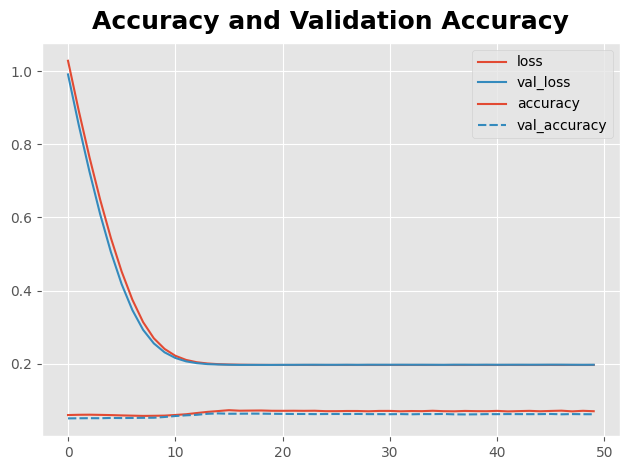

Maximum Validation Accuracy: 0.0639


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
import seaborn as sns
sns.lineplot(data=history_df.loc[0:, ['accuracy', 'val_accuracy']])
plt.title('Accuracy and Validation Accuracy')
plt.show()
print("Maximum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))


Minimum Validation Loss: 0.1966


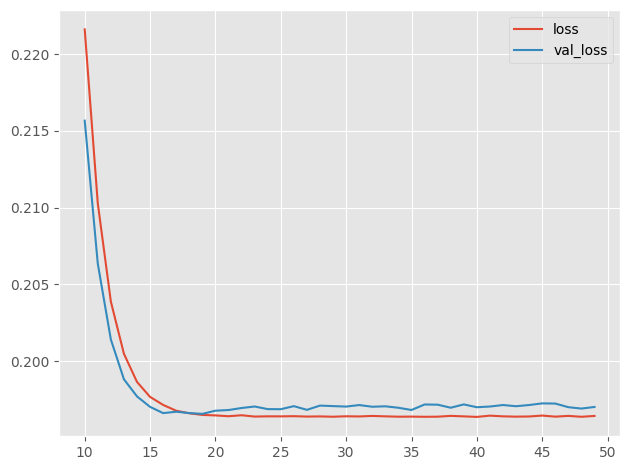

In [16]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Analyse the validation Loss and Check if it's underfitting or overfitting <br>
Write 200 Words on what you think is happening ?

Add some capacity to our network. We'll add three hidden layers with 128 units each. Run the next cell to train the network and see the learning curves.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0653 - loss: 0.2505 - val_accuracy: 0.0604 - val_loss: 0.2074
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0712 - loss: 0.1995 - val_accuracy: 0.0580 - val_loss: 0.2017
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0708 - loss: 0.1947 - val_accuracy: 0.0594 - val_loss: 0.2001
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0703 - loss: 0.1919 - val_accuracy: 0.0603 - val_loss: 0.2004
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0694 - loss: 0.1892 - val_accuracy: 0.0546 - val_loss: 0.2002
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0680 - loss: 0.1870 - val_accuracy: 0.0558 - val_loss: 0.2004
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0664 - loss: 0.1854 - val_accuracy: 0.0567 - val_loss: 0.2001
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0722 - loss: 0.1859 - val_accuracy: 0.0624 - val_loss: 0.1989
E

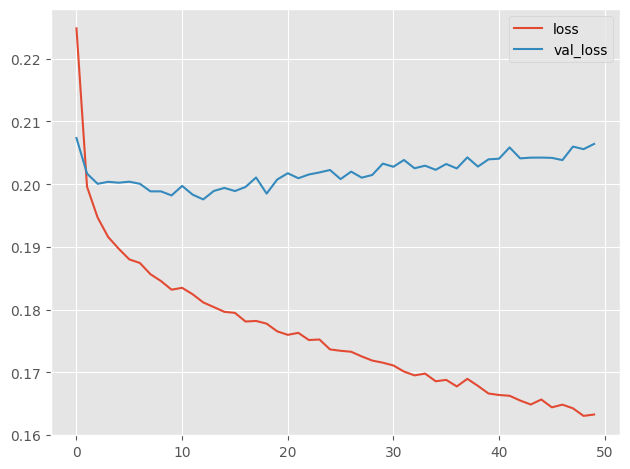

In [23]:
model = keras.Sequential([
    ##################################### Check Point 3 #########################################
    # Insert layers as suggested
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Is the Obtained Validation accuracy the best possible for the data. What is happening in the model and what is the reason for this behaviour explain in 200 Words.

In [24]:
# Write code to find best validation accuracy
import pandas as pd

# Assuming 'history' is the output from model.fit(...)
history_df = pd.DataFrame(history.history)

# Find and print the best validation accuracy
best_val_acc = history_df['val_accuracy'].max()
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Best Validation Accuracy: 0.0640


In [25]:
# Write Code to stop the training if we have decreasing validation accuracy in 3 iterations
# Write a function from Scratch, Don't use call backs directly
def train_with_early_stopping(model, X_train, y_train, X_valid, y_valid, batch_size=512, epochs=50, patience=3):
    best_val_accuracy = -1
    no_improvement_count = 0

    for epoch in range(epochs):
        # Training step
        history = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            batch_size=batch_size,
            epochs=1,  # Train for 1 epoch at a time
            verbose=1    # Set verbose to 1 to see progress during training
        )

        # Check validation accuracy
        val_accuracy = history.history['val_accuracy'][0]

        # Track the best validation accuracy and check for early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        print(f"Epoch {epoch+1} - Validation Accuracy: {val_accuracy:.4f}")

        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"No improvement in validation accuracy for {patience} epochs. Stopping training.")
            break

    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

# Usage example:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

train_with_early_stopping(model, X_train, y_train, X_valid, y_valid, batch_size=512, epochs=50, patience=3)

############################################  Check point 4 #################################################

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0595 - loss: 0.2532 - val_accuracy: 0.0597 - val_loss: 0.2056
Epoch 1 - Validation Accuracy: 0.0597
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0688 - loss: 0.2005 - val_accuracy: 0.0578 - val_loss: 0.2022
Epoch 2 - Validation Accuracy: 0.0578
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0705 - loss: 0.1956 - val_accuracy: 0.0625 - val_loss: 0.1998
Epoch 3 - Validation Accuracy: 0.0625
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0721 - loss: 0.1919 - val_accuracy: 0.0603 - val_loss: 0.1997
Epoch 4 - Validation Accuracy: 0.0603
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0695 - loss: 0.1901 - val_accuracy: 0.0594 - val_loss: 0.1989
Epoch 5 - Validation Accuracy: 0.0594
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0717 - loss: 0.1891 - val_accuracy: 0.0590 - val_loss: 0.1987
Epoch 6 - Validation Accuracy: 0.0590
No improvement in validation accuracy for 3 epochs. Stopping training.
Best Va

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.0598 - loss: 0.3165 - val_accuracy: 0.0536 - val_loss: 0.2093
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0682 - loss: 0.2051 - val_accuracy: 0.0590 - val_loss: 0.2032
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0678 - loss: 0.1976 - val_accuracy: 0.0594 - val_loss: 0.1999
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0703 - loss: 0.1945 - val_accuracy: 0.0573 - val_loss: 0.1986
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0667 - loss: 0.1907 - val_accuracy: 0.0547 - val_loss: 0.1984
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0710 - loss: 0.1904 - val_accuracy: 0.0537 - val_loss: 0.1983
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0675 - loss: 0.1877 - val_accuracy: 0.0542 - val_loss: 0.1989
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0692 - loss: 0.1873 - val_accuracy: 0.0606 - val

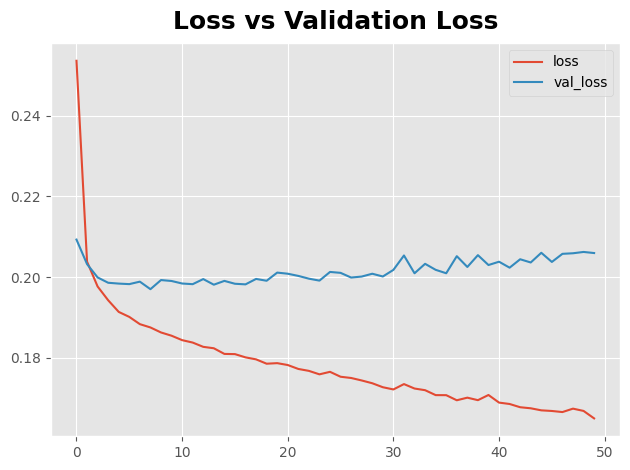

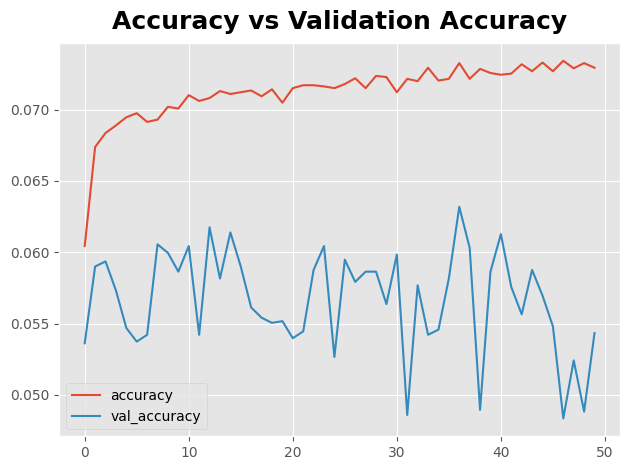

In [27]:
# Train the Model with this
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['accuracy']  # accuracy used just for monitoring
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=512,
    verbose=1
)

# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot training and validation loss
history_df[['loss', 'val_loss']].plot(title='Loss vs Validation Loss')

# Plot training and validation accuracy
history_df[['accuracy', 'val_accuracy']].plot(title='Accuracy vs Validation Accuracy')

# Get the best validation accuracy
best_val_acc = history_df['val_accuracy'].max()
print(f"✅ Best Validation Accuracy: {best_val_acc:.4f}")
